In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
#Data Import
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Data loc
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [ ]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [ ]:
#Matrix Covariance
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
#Eigenn Values
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [ ]:
vectors[:5]

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [ ]:
#Explained Variances
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0000000000000002 
 [0.7277045209380135, 0.2303052326768065, 0.03683831957627379, 0.005151926808906321]


In [ ]:
#Table Visualization
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


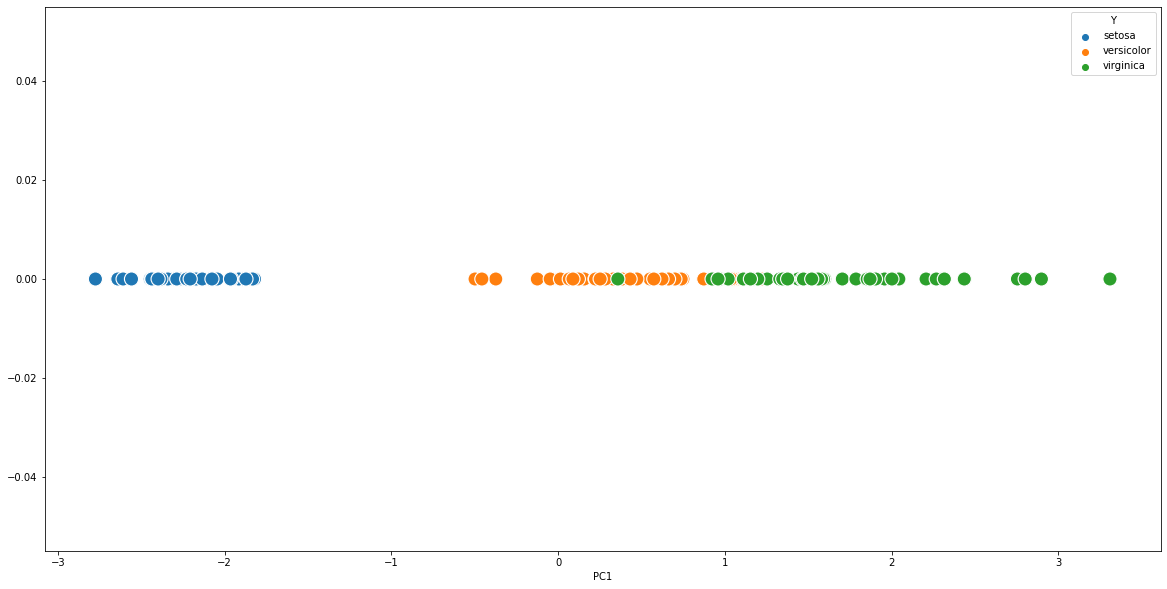

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


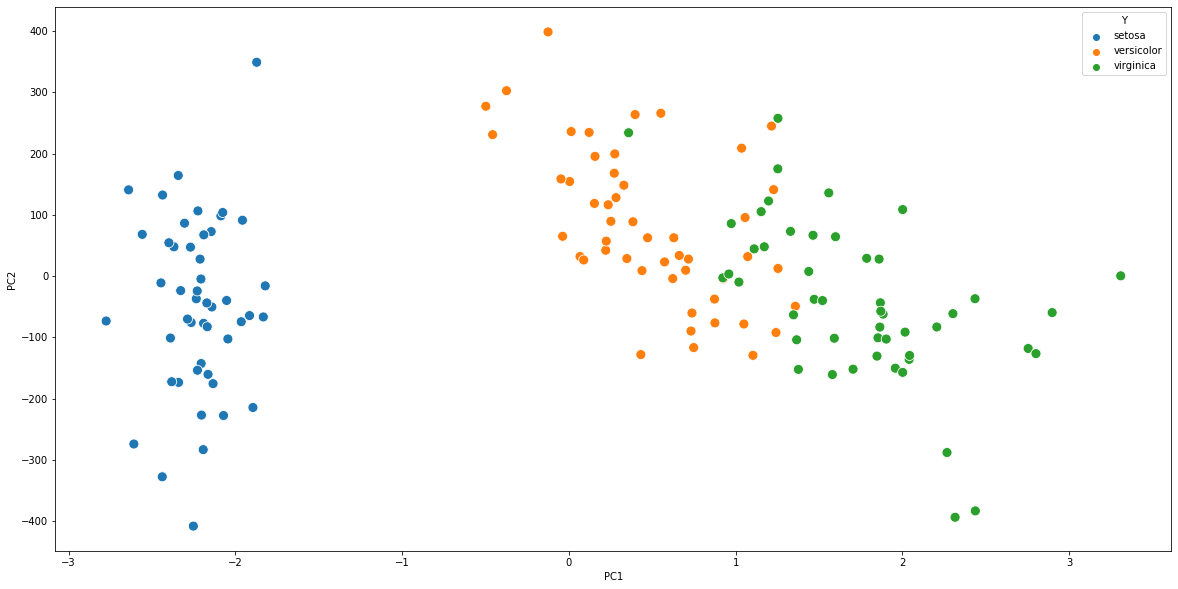

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'] * len(res), hue=res['Y'], s=100)

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X, y,test_size=0.50)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(75, 4) (75, 4) (75,) (75,)


In [ ]:
classifierA = MLPClassifier(alpha=1e-10, hidden_layer_sizes=(3,3),random_state=1)
classifierA.fit(X_train, Y_train)

predict= classifierA.predict(X_test)

score = metrics.accuracy_score(predict,Y_test)
print('The accuracy of the Multi-layer Perceptron is: '+str(score))

The accuracy of the Multi-layer Perceptron is: 0.7733333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
classifierB = MLPClassifier(alpha=1e-10, hidden_layer_sizes=(9,9),random_state=1)
classifierB.fit(X_train, Y_train)

predict= classifierB.predict(X_test)

score = metrics.accuracy_score(predict,Y_test)
print('The accuracy of the Multi-layer Perceptron is: '+str(score))

The accuracy of the Multi-layer Perceptron is: 0.96


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
classifierC = MLPClassifier(alpha=1e-10, hidden_layer_sizes=(5,5,5), random_state=1)
classifierC.fit(X_train, Y_train)

predict= classifierC.predict(X_test)

score = metrics.accuracy_score(predict,Y_test)
print('The accuracy of the Multi-layer Perceptron is: '+str(score))

The accuracy of the Multi-layer Perceptron is: 0.8266666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
